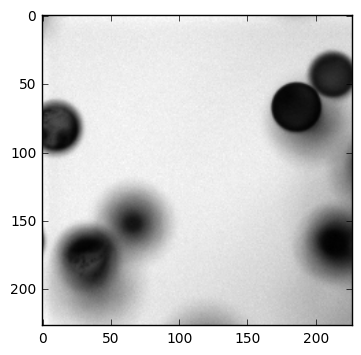

In [6]:
# Implementation of AlexNet architecture. Later to be reconfigured for semantic segmentation

%matplotlib inline

import numpy as np
import os
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy import misc
from skimage import io
from skimage import transform


INPUT_SIZE = 227 # Input image dimensions, the input images are square.
num_labels  =2 #  number of output classes. This is a binary classifier


data_path = '/Volumes/Elements/PROJECT_DATA/Basalt_5%/Basalt_125-150_5%_22-07-2016_2'

labels_path = '/Volumes/Elements/PROJECT_DATA/Basalt_5%/labels'




# load one input image to test on
path = '/Users/jonathandonnelly/Desktop'
image= misc.imread(os.path.join(path,'0.bmp'), flatten= 0)

# Crop the image so that it is square. This means that when reshaped it will retain the same aspect ratio
image_crop = image[:,0:1024] # crop the image so that it is square

# Resize the image to fit into the AlexNet
image_resized = transform.resize(image_crop, (227, 227)) 

plt.imshow(image_resized, cmap = 'gray')

# Reshape the image to 4d Tensor before passing it to the placeholder 
image_4d = np.reshape(image_resized, [1,INPUT_SIZE,INPUT_SIZE,1])





In [7]:
# This is the input to the network which consists of the input images and the assosciated labels


with tf.name_scope('Input'):
    x = tf.placeholder(tf.float32, shape = (None,INPUT_SIZE,INPUT_SIZE,1)) # placeholder for the input images
    labels = tf.placeholder(tf.int32, shape = (1,INPUT_SIZE,INPUT_SIZE,1)) # ground truth labelled images
    
    

In [8]:
# First Convolutional Layer with RELu

with tf.name_scope('Conv_1'):
    # the Filter_1 variable consists of 96 Filters, each with a width and height of 11 and with 1 channel
    Filters_1 = tf.Variable(tf.random_normal([11, 11, 1, 96], stddev = 0.35), name = 'Filters_1')
    
    Biases_1 = tf.Variable(tf.constant(0.1, shape = [96]), name="Biases_1") # 
    # The first convolution operation in the network
    conv_1 = tf.nn.relu(tf.nn.conv2d(x, Filters_1, strides = [1,4,4,1], padding = 'VALID')+Biases_1)
    
    
init = tf.global_variables_initializer()   
    
sess = tf.Session()
sess.run(init)
conv1_op = (sess.run(conv_1, feed_dict={x: image_4d}))
conv1_op.shape


#plt.imshow(sess.run(Kernel_1),cmap = 'gray')# look at the kernel
#sess.run(Kernel_1).shape
#plt.imshow(Kernel_1)

(1, 55, 55, 96)

In [9]:
with tf.name_scope('Norm_1'):
    # Local Response Normalisation applied to the first convolutional layer
    conv_1_norm = tf.nn.local_response_normalization(conv_1, 5, 2, 10**-4, 0.75 )
       
init = tf.global_variables_initializer()   
    
sess = tf.Session()
sess.run(init)
conv1_op = (sess.run(conv_1_norm, feed_dict={x: image_4d}))
conv1_op.shape    

(1, 55, 55, 96)

In [10]:

# First Pooling Layer

with tf.name_scope('Pool_1'):
    Pool_1 = tf.nn.max_pool(conv_1_norm, ksize = [1,3,3,1], strides = [1,2,2,1], padding = 'VALID')
    

init = tf.global_variables_initializer()       
    
sess = tf.Session()
sess.run(init)



pool1_op = (sess.run(Pool_1, feed_dict={x: image_4d}))
pool1_op.shape


(1, 27, 27, 96)

In [11]:
# Second Convolutional Layer


with tf.name_scope('Conv_2'):
    
    Filters_2 = tf.Variable(tf.random_normal([5, 5, 96, 256], stddev = 0.35), name = 'Kernel2')
   
    Biases_2 = tf.Variable(tf.constant(0.1, shape = [256]), name="Biases_1")
    
    conv_2 = tf.nn.relu(tf.nn.conv2d(Pool_1, Filters_2, strides = [1,1,1,1], padding = 'SAME') + Biases_2)


init = tf.global_variables_initializer()    
sess = tf.Session()
sess.run(init)

conv2_op = (sess.run(conv_2, feed_dict={x: image_4d})) # feed in the output from the previous layer
conv2_op.shape    


(1, 27, 27, 256)

In [12]:
with tf.name_scope('Norm_2'):
    
    conv_2_norm = tf.nn.local_response_normalization(conv_2, 5, 2, 10**-4, 0.75 )
    
    
    
init = tf.global_variables_initializer()      
sess = tf.Session()
sess.run(init)
conv1_op = (sess.run(conv_2_norm, feed_dict={x: image_4d}))
conv1_op.shape    
    

(1, 27, 27, 256)

In [15]:
# Second Pooling Layr

with tf.name_scope('Pool_2'):
     Pool_2 = tf.nn.max_pool(conv_2, ksize = [1,3,3,1], strides = [1,2,2,1], padding = 'VALID')


init = tf.global_variables_initializer()     
sess = tf.Session()
sess.run(init)

Pool2_op = (sess.run(Pool_2, feed_dict={x: image_4d})) # feed in the output from the previous layer
Pool2_op.shape         

(1, 13, 13, 256)

In [16]:
# Third Convolutional Layer
    
with tf.name_scope('Conv_3'):
    Filters_3 = tf.Variable(tf.random_normal([3, 3, 256, 384], stddev = 0.35), name = 'Kernel3')
   
    Biases_3 = tf.Variable(tf.constant(0.1, shape = [384]), name="Biases_3")
    
    conv_3 = tf.nn.relu(tf.nn.conv2d(Pool_2, Filters_3, strides = [1,1,1,1], padding = 'SAME') + Biases_3)
    
init = tf.global_variables_initializer()    
sess = tf.Session()
sess.run(init)

conv3_op = (sess.run(conv_3, feed_dict={x: image_4d})) # feed in the output from the previous layer
conv3_op.shape  


(1, 13, 13, 384)

In [21]:
# Fourth Convolutional Layer


with tf.name_scope('Conv_4'):
    Filters_4 = tf.Variable(tf.random_normal([3, 3, 384, 384], stddev = 0.35), name = 'Kernel3')
   
    Biases_4 = tf.Variable(tf.constant(0.1, shape = [384]), name="Biases_4")
    
    conv_4 = tf.nn.relu(tf.nn.conv2d(conv_3, Filters_4, strides = [1,1,1,1], padding = 'SAME')+Biases_4)
    
init = tf.global_variables_initializer()    
sess = tf.Session()
sess.run(init)

conv4_op = (sess.run(conv_4, feed_dict={x: image_4d})) # feed in the output from the previous layer
conv4_op.shape  



(1, 13, 13, 384)

In [27]:
# Fifth convolutional Layer

with tf.name_scope('Conv_5'):
    
    Filters_5 = tf.Variable(tf.random_normal([3, 3, 384, 256], stddev = 0.35), name = 'Kernel3')
   
    Biases_5 = tf.Variable(tf.constant(0.1, shape = [256]), name="Biases_5")
    
    conv_5 = tf.nn.relu(tf.nn.conv2d(conv_4, Filters_5, strides = [1,1,1,1], padding = 'SAME')+Biases_5)
    
    
init = tf.global_variables_initializer()   
sess = tf.Session()
sess.run(init)

conv5_op = (sess.run(conv_5, feed_dict={x: image_4d})) # feed in the output from the previous layer
conv5_op.shape  








(1, 13, 13, 256)

In [28]:
# Add another max pooling layer here and then the fully connected layers 



with tf.name_scope('Pool_3'):
    
     Pool_3 = tf.nn.max_pool(conv_5, ksize = [1,3,3,1], strides = [1,2,2,1], padding = 'VALID')


init = tf.global_variables_initializer()   
sess = tf.Session()
sess.run(init)

Pool3_op = (sess.run(Pool_3, feed_dict={x: image_4d})) # feed in the output from the previous layer
Pool3_op.shape         









(1, 6, 6, 256)

In [29]:
 # First Fully Convolutional layer
    
with tf.name_scope('FConv_1'):
    
    # Fully Convolutional layer

    Filter_FC1 = tf.Variable(tf.random_normal([6, 6, 256, 4096], stddev = 0.35), name = 'Kernel_FC1')
   
    Biases_FC1 = tf.Variable(tf.constant(0.1, shape = [4096]), name="Biases_FC1")
    
    conv_FC1 = tf.nn.relu(tf.nn.conv2d(Pool_3, Filter_FC1, strides = [1,1,1,1], padding = 'VALID'))
    
init = tf.global_variables_initializer()    
sess = tf.Session()
sess.run(init)

conv5_op = (sess.run(conv_FC1, feed_dict={x: image_4d})) # feed in the output from the previous layer
conv5_op.shape  





(1, 1, 1, 4096)

In [30]:
 # Second Fully convolutional layer   
    
    
with tf.name_scope('FConv_2'):
    
    # Fully Convolutional layer

    Filter_FC2 = tf.Variable(tf.random_normal([1, 1, 4096, 4096], stddev = 0.35), name = 'Kernel_FC2')
   
    Biases_FC2 = tf.Variable(tf.constant(0.1, shape = [4096]), name="Biases_FC2")
    
    conv_FC2 = tf.nn.relu(tf.nn.conv2d(conv_FC1, Filter_FC2, strides = [1,1,1,1], padding = 'VALID'))
    
    
    
init = tf.global_variables_initializer()    
sess = tf.Session()
sess.run(init)

conv5_op = (sess.run(conv_FC2, feed_dict={x: image_4d})) # feed in the output from the previous layer
conv5_op.shape  





(1, 1, 1, 4096)

In [31]:
# Binary clasiifier layer to predict each of the output classes

with tf.name_scope('Binary_layer'):
    
    # Fully Convolutional layer

    Filter_BL = tf.Variable(tf.random_normal([1, 1, 4096, 2], stddev = 0.35), name = 'Kernel_BL')
   
    Biases_BL = tf.Variable(tf.constant(0.1, shape = [4096]), name="Biases_BL")
    
    conv_BL = tf.nn.relu(tf.nn.conv2d(conv_FC2, Filter_BL, strides = [1,1,1,1], padding = 'VALID'))
    
    
    
init = tf.global_variables_initializer()   
sess = tf.Session()
sess.run(init)

conv5_op = (sess.run(conv_BL, feed_dict={x: image_4d})) # feed in the output from the previous layer
conv5_op.shape  





(1, 1, 1, 2)

<class 'numpy.ndarray'>


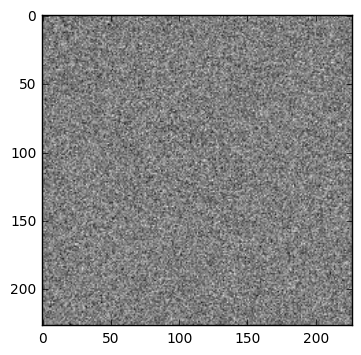

In [32]:
# Upsampling layer


# Upsampling Deconvolution layer. Takes the binary output form the previous layer and upsamples to an image of equal 
# dimensions to the output

output_shape = [1, 227, 227, 2]
strides = [1, 1, 1, 1]


with tf.name_scope('Upsampling_layer'):

    #
    Filter_UP = tf.Variable(tf.random_normal([227, 227, 2, 2], stddev = 0.35), name = 'Kernel_UP')
    
    #Biases_UP = tf.Variable(tf.constant(0.1, shape = [4096]), name="Biases_UP")
    
    conv_up = tf.nn.conv2d_transpose(conv_BL, Filter_UP, output_shape = output_shape, strides = strides, padding='VALID')

    
init = tf.global_variables_initializer()   
sess = tf.Session()
sess.run(init)




#print(w.get_shape)
#print(conv_BL.get_shape)
#print(conv_up.get_shape)

      
      
upsample = (sess.run(conv_up, feed_dict={x: image_4d})) # feed in the output from the previous layer
upsample.shape  

print(type(upsample))
upsample.dtype


test = np.squeeze(upsample)
#print(tyßpe(test))
#test.get_shape()

plt.imshow(test[:,:,0], cmap = 'gray')




In [119]:


# Loss computation
logits = tf.reshape(conv_up, [-1, num_labels])
reshaped_labels = tf.reshape(labels, [-1])
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, reshaped_labels)
loss = tf.reduce_mean(cross_entropy)

optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

training_epochs = 10

for epoch in range(training_epochs):

        # number of batches in one epoch
        batch_count = int(mnist.train.num_examples/batch_size)

        for i in range(batch_count):
            batch_x, batch_y = mnist.train.next_batch(batch_size)

            # perform the operations we defined earlier on batch
            _, summary = sess.run([train_op, summary_op], feed_dict={x: batch_x, y_: batch_y})
            
            # write log
            writer.add_summary(summary, epoch * batch_count + i)

        if epoch % 5 == 0:
            print("Epoch: ", epoch)
    print("Accuracy: ", accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    print("done")



In [ ]:

# from the example mnist script just for guidance

with tf.name_scope('Accuracy'):
    # Accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# create a summary for our cost and accuracy
tf.scalar_summary("cost", cross_entropy)
tf.scalar_summary("accuracy", accuracy)
tf.scalar_summary("softmax", y) 

# merge all summaries into a single "operation" which we can execute in a session
summary_op = tf.merge_all_summaries()

with tf.Session() as sess:
    # variables need to be initialized before we can use them
    sess.run(tf.initialize_all_variables())

    # create log writer object
    writer = tf.train.SummaryWriter(logs_path, graph=tf.get_default_graph())

    # perform training cycles
    for epoch in range(training_epochs):

        # number of batches in one epoch
        batch_count = int(mnist.train.num_examples/batch_size)

        for i in range(batch_count):
            batch_x, batch_y = mnist.train.next_batch(batch_size)

            # perform the operations we defined earlier on batch
            _, summary = sess.run([train_op, summary_op], feed_dict={x: batch_x, y_: batch_y})
            
            # write log
            writer.add_summary(summary, epoch * batch_count + i)

        if epoch % 5 == 0:
            print("Epoch: ", epoch)
    print("Accuracy: ", accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    print("done")


In [106]:
from skimage import transform as tran

path = '/Users/jonathandonnelly/Desktop/PROJECT_DATA/Basalt_5%/TEST_IMAGES/Raw'
image= misc.imread(os.path.join(path,'0.bmp'), flatten= 0)
image_crop = image[:,0:1024]
plt.imshow(image_crop, cmap = 'gray')
image_resize = tran.resize(image_crop, (227, 227))
image_resize.shape
plt.imshow(image_resize, cmap = 'gray')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jonathandonnelly/Desktop/PROJECT_DATA/Basalt_5%/TEST_IMAGES/Raw/0.bmp'

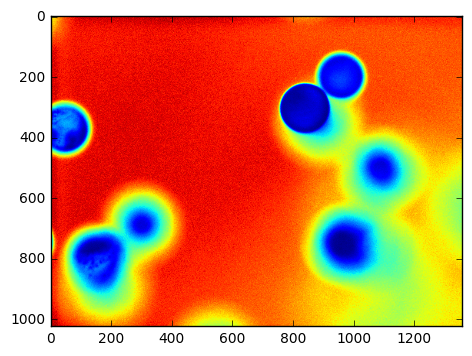

In [60]:
plt.imshow(image)

In [68]:
INPUTS = tf.float32(1,INPUT_SIZE,INPUT_SIZE,1)



TypeError: 'DType' object is not callable

(1024, 1360)

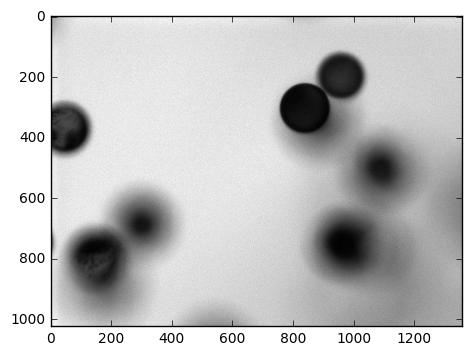

In [36]:
plt.imshow(image[:,:],cmap="gray")
image.shape

(3, 8, 8, 128)


In [61]:
output = tf.constant(0.1, shape=output_shape)
expected_l = tf.nn.conv2d(output, w, strides=strides, padding='SAME')
print(expected_l.get_shape())

(3, 4, 4, 4)
